In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import time
from ucimlrepo import fetch_ucirepo 

from TopoMap import TopoMap

import gudhi

from TopoMap2 import TopoMap2

from TopoMapMLpack import TopoMapMlPack

In [2]:
def plot_persistance_diagrams_projection(X, proj, y, y_column='class'):
    rips_original = gudhi.RipsComplex(points=X.to_numpy())
    st_original = rips_original.create_simplex_tree(max_dimension=1)

    rips_proj = gudhi.RipsComplex(points=proj)
    st_projection = rips_proj.create_simplex_tree(max_dimension=1)

    diag_original = st_original.persistence(min_persistence=0)
    diag_proj = st_projection.persistence(min_persistence=0)

    I_original = st_original.persistence_intervals_in_dimension(0)
    I_proj = st_projection.persistence_intervals_in_dimension(0)
    

    bt_blobs = gudhi.bottleneck_distance(I_original, I_proj)
    print(f"Bottleneck distance: {bt_blobs:.10f}")    
    
    # Create image
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    gudhi.plot_persistence_diagram(diag_original, axes=axs[0])
    axs[0].set_title('Persistance - Original Points')

    gudhi.plot_persistence_diagram(diag_proj, axes=axs[1])
    axs[1].set_title('Persistance - Projections')

    colors = [px.colors.qualitative.D3[i] for i in range(10)]

    i = 0
    for cluster in y[y_column].unique():
        i_cluster = list(y[y[y_column]==cluster].index)
        axs[2].scatter(proj[i_cluster,0], proj[i_cluster,1],
                c=colors[i], s=5)
        i += 1
    axs[2].set_xticks([])
    axs[2].set_yticks([])
    axs[2].set_title('Projection')
    
    fig.suptitle('Persistence diagrams and Projection')
    fig.tight_layout()
    
    return fig

In [3]:

def Run_ANN_test(X,y,dataset_name,index_path,y_column = 'class', Isnumpy = False):
    if(not Isnumpy):
        X_numpy = X.to_numpy(copy=True)

    else:
        X_numpy = X
    
    topomap_MLpack = TopoMap2(X_numpy,approach = 'mlpack')
    proj_topomapMlpack = topomap_MLpack.run()

    topomap_ANN = TopoMap2(X_numpy,index_path=index_path, approach = 'ANN')
    proj_topomapANN = topomap_ANN.run()

    topomap_original = TopoMap(X)
    proj_original= topomap_original.run()

    topomap_ANN_drop = TopoMap2(X_numpy,index_path=index_path,drop_zeros=True,approach = 'ANN')
    proj_topomapANN_drop = topomap_ANN_drop.run()
    

    fig = plot_persistance_diagrams_projection(X, proj_topomapANN, y,y_column=y_column)
    fig.suptitle(f'Persistance Diagrams and Projection with TopomapANN- {dataset_name} Dataset')
    plt.show()

    fig = plot_persistance_diagrams_projection(X, proj_topomapMlpack, y,y_column=y_column)
    fig.suptitle(f'Persistance Diagrams and Projection with Topomap MLpack  - {dataset_name} Dataset')
    plt.show()
    
    fig = plot_persistance_diagrams_projection(X, proj_topomapANN_drop, y,y_column=y_column)
    fig.suptitle(f'Persistance Diagrams and Projection with Topomap ANN_ droping zeros - {dataset_name} Dataset')
    plt.show()

    fig = plot_persistance_diagrams_projection(X, proj_original, y,y_column=y_column)
    fig.suptitle(f'Persistance Diagrams and Projection with Topomap - {dataset_name} Dataset')
    plt.show()

    

    



## Iris

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
index_path = "./data/index_Iris_R64_L100_A1.2"

# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 




In [5]:
Run_ANN_test(X,y,index_path=index_path,dataset_name="Iris")

TypeError: TopoMap2.__init__() missing 1 required positional argument: 'index_path'

## Seeds

In [6]:
data_seeds = pd.read_csv('data/UCI/seeds/seeds_dataset.txt', sep='\t',
                         header=None,
                         names=['x1','x2','x3','x4','x5','x6','x7','class'])

X = data_seeds.copy().drop(['class'], axis=1)
y = data_seeds[['class']]
index_path = './data/index_seeds_R64_L100_A1.2'

Bottleneck distance: 0.0000049849


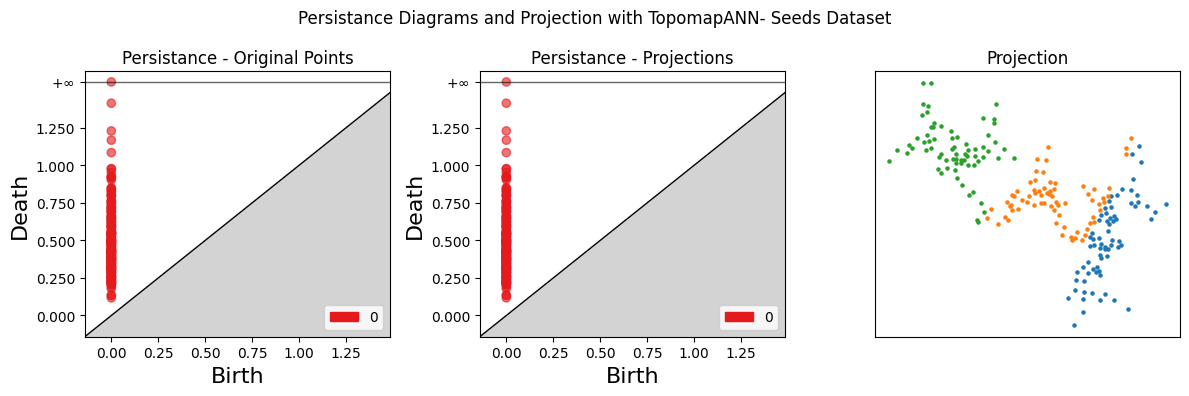

Bottleneck distance: 0.0000049849


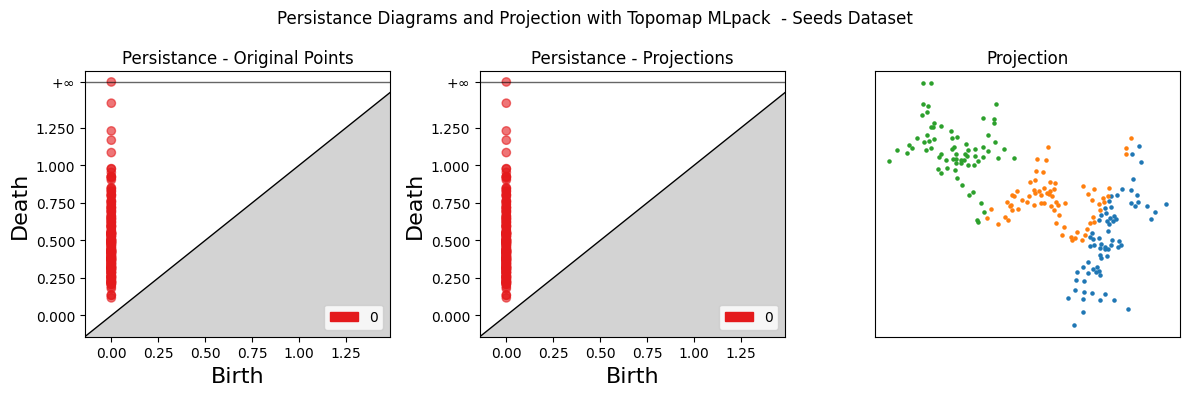

Bottleneck distance: 0.0000049849


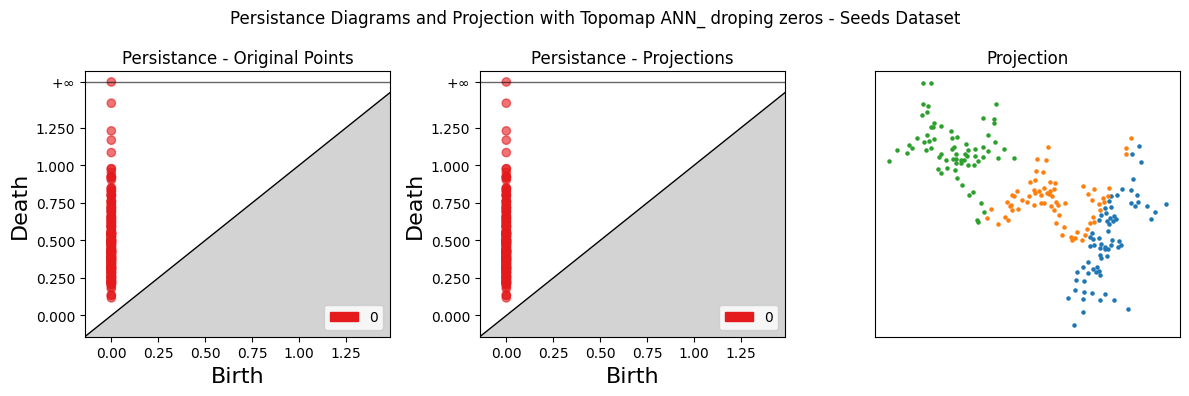

Bottleneck distance: 0.0000066758


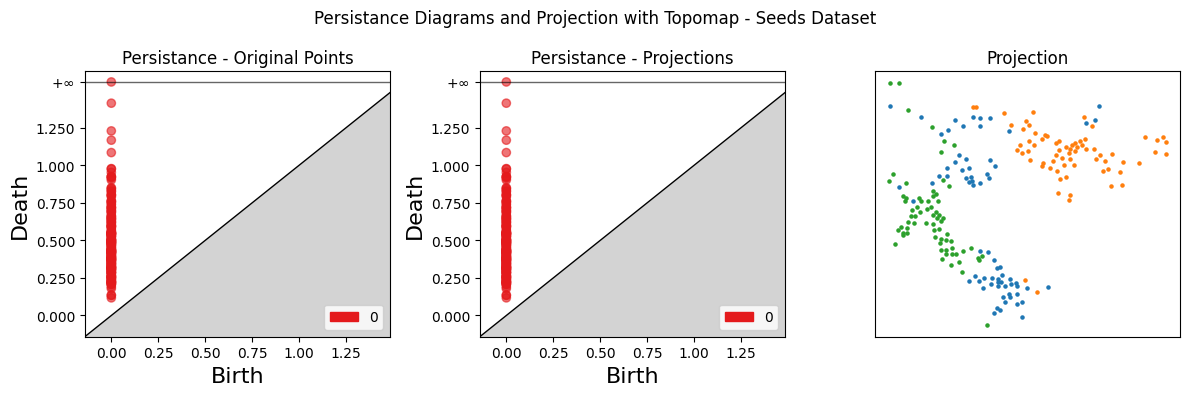

In [7]:
Run_ANN_test(X,y,dataset_name="Seeds", index_path=index_path)

## Cancer

In [8]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
y_column = 'Class'
X.fillna(method = 'ffill',inplace=True)
index_path = "./data/index_Cancer_R64_L100_A1.2"

C:\Users\felip\AppData\Local\Temp\ipykernel_18552\1304871373.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method = 'ffill',inplace=True)
C:\Users\felip\AppData\Local\Temp\ipykernel_18552\1304871373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(method = 'ffill',inplace=True)


Bottleneck distance: 0.1666599172


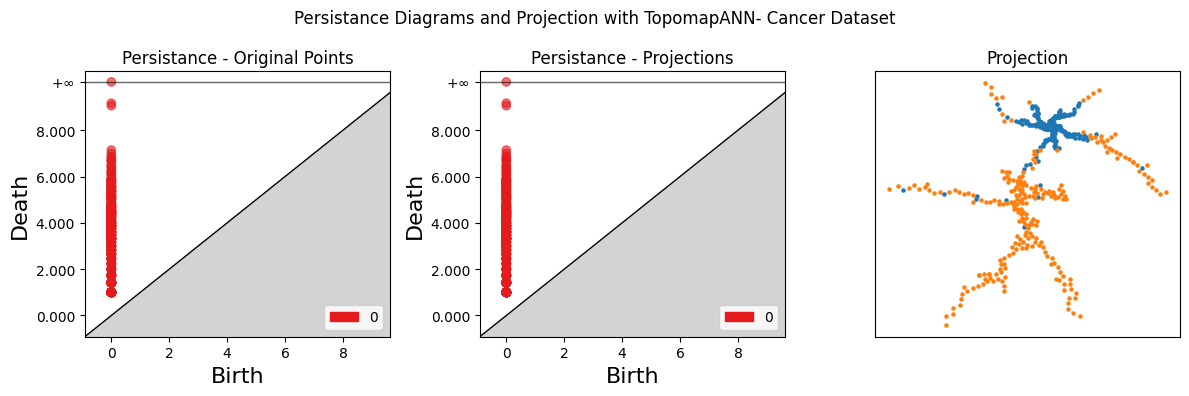

Bottleneck distance: 0.0001615393


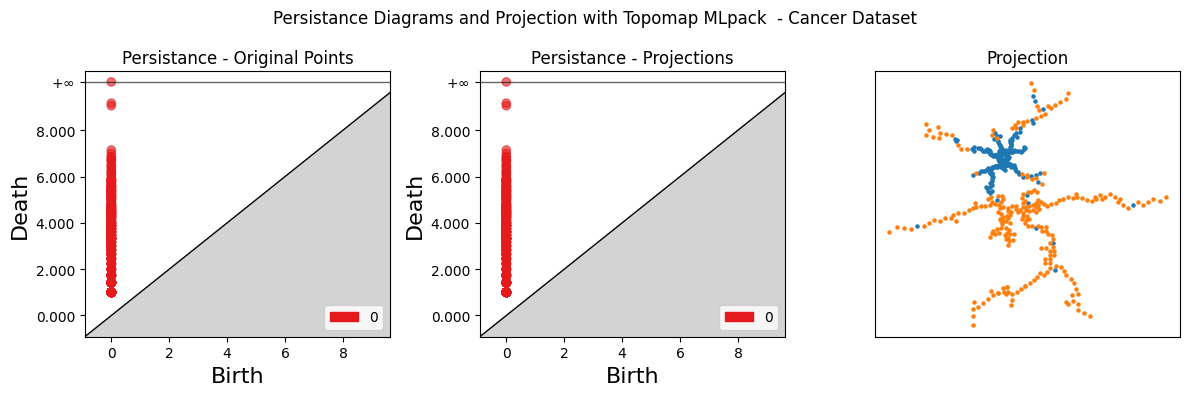

Bottleneck distance: 0.5000099129


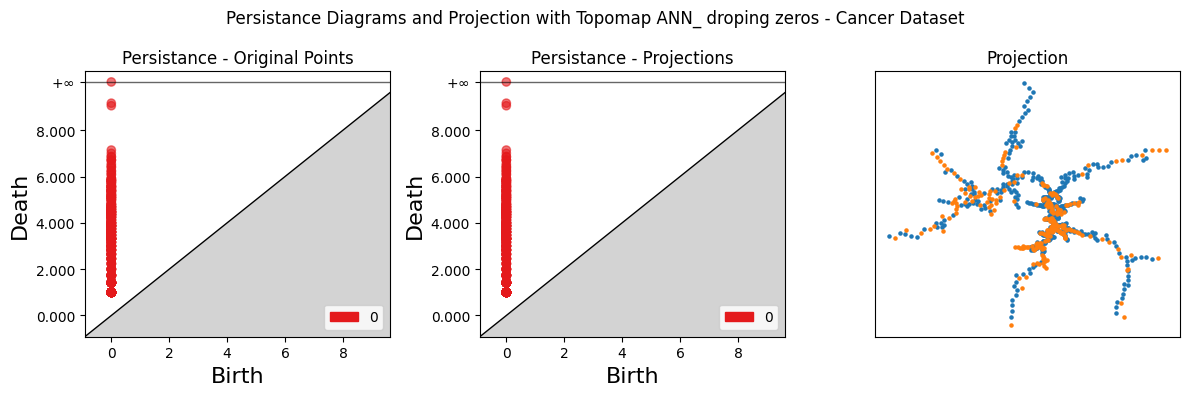

Bottleneck distance: 0.5000118817


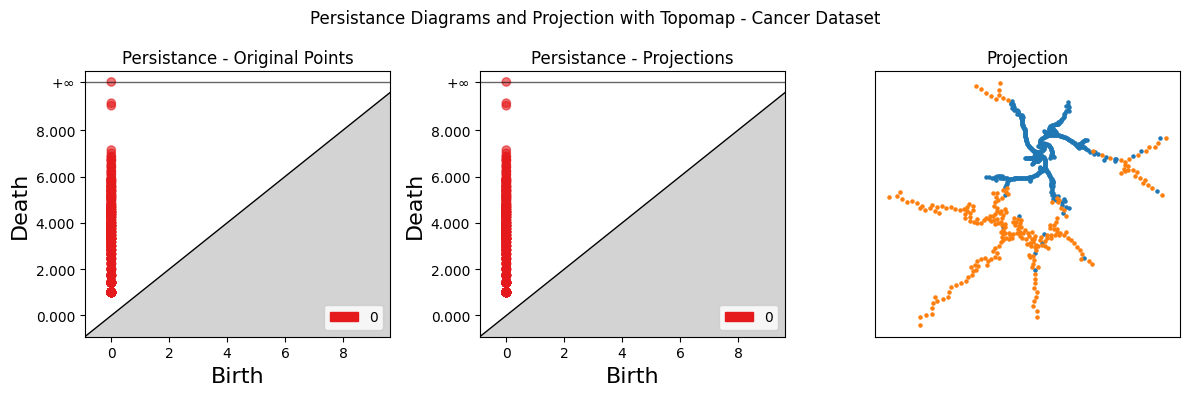

In [9]:
Run_ANN_test(X,y,dataset_name="Cancer",y_column= y_column, index_path=index_path)

## MFeat

In [10]:
data_mfeat = pd.read_csv('data/UCI/multiple+features/mfeat-kar', sep='\s+',
                         header=None,
                         names=['x'+str(i) for i in range(1,65)])
data_mfeat['class'] = 0
for i, row in data_mfeat.iterrows():
    data_mfeat.loc[i,'class'] = i//200

X = data_mfeat.drop(['class'], axis=1)
y = data_mfeat[['class']]
index_path = "./data/index_MFeat_R64_L100_A1.2"

Bottleneck distance: 0.0020835208


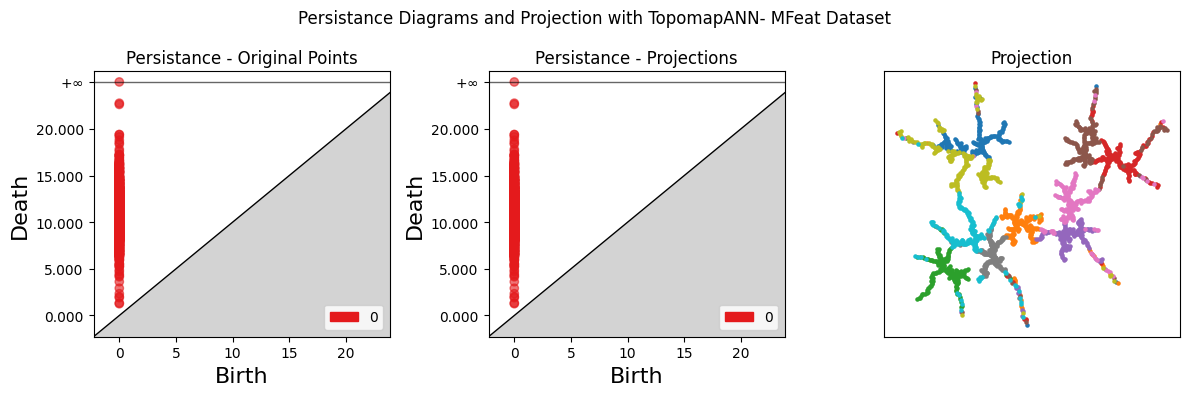

Bottleneck distance: 0.0020835208


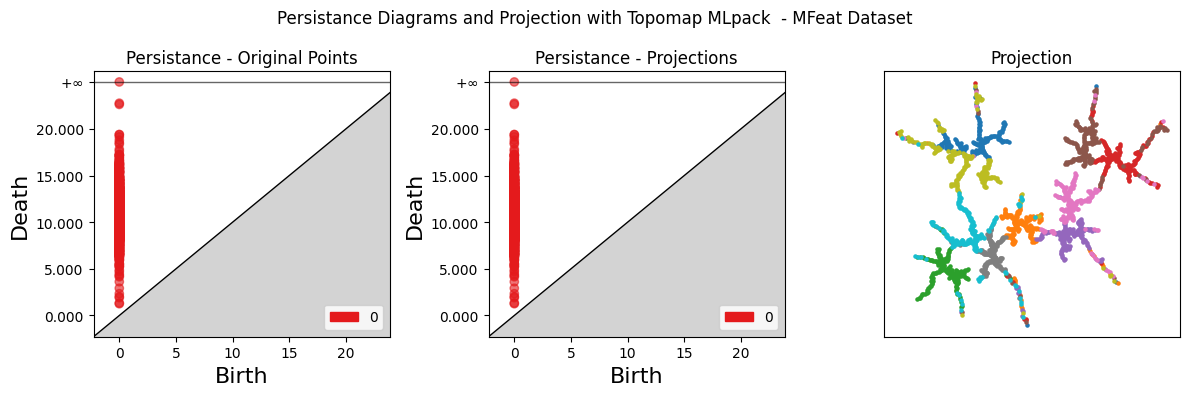

Bottleneck distance: 2.3504559412


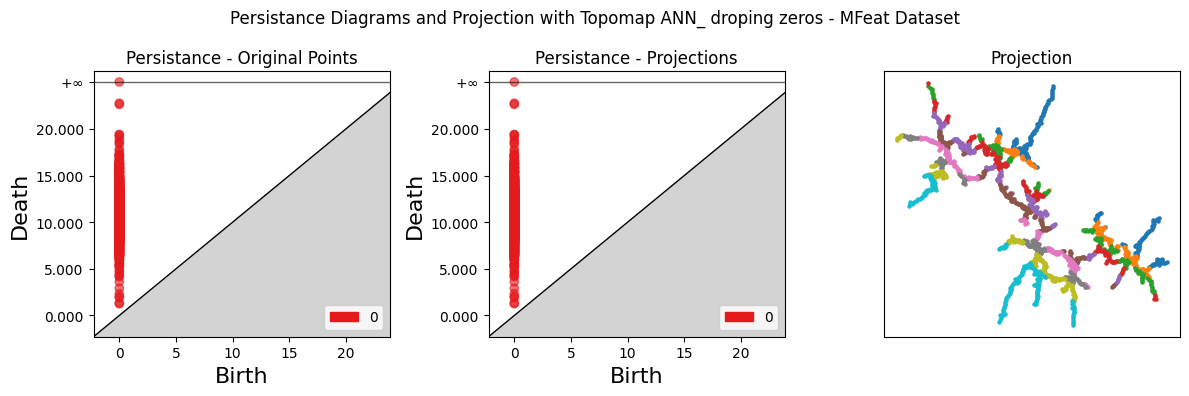

Bottleneck distance: 2.3507160932


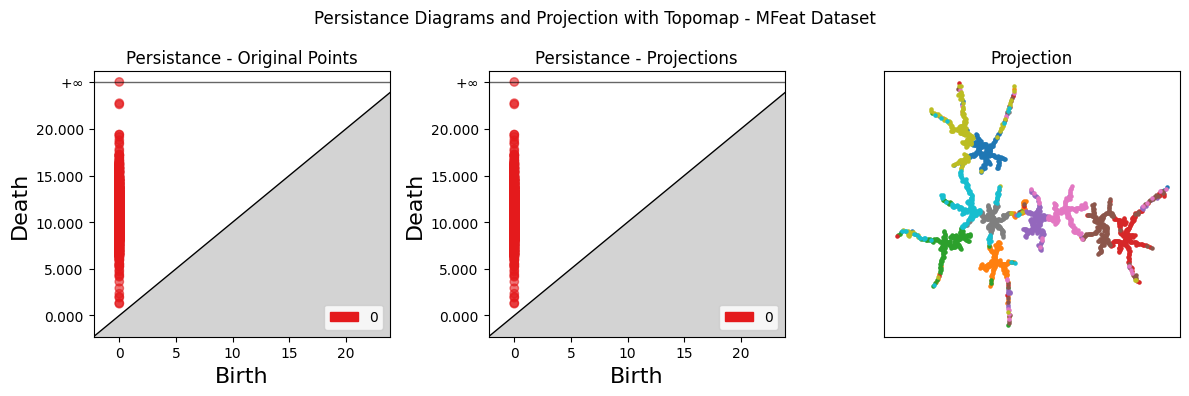

In [11]:
Run_ANN_test(X,y,dataset_name="MFeat",index_path=index_path)

In [50]:
def calc_distance(X, proj):
    rips_original = gudhi.RipsComplex(points=X)
    st_original = rips_original.create_simplex_tree(max_dimension=1)

    rips_proj = gudhi.RipsComplex(points=proj)
    st_projection = rips_proj.create_simplex_tree(max_dimension=1)
    
    diag_original = st_original.persistence(min_persistence=0)
    diag_proj = st_projection.persistence(min_persistence=0)

    I_original = st_original.persistence_intervals_in_dimension(0)
    I_proj = st_projection.persistence_intervals_in_dimension(0)
    

    return gudhi.bottleneck_distance(I_original, I_proj)

In [48]:
import dataset_utils
from dataset_utils import fvecs_read
def ANN_test_without_plot(data_path,index_path):
    X = dataset_utils.fvecs_read(data_path)
    

    topomap_ANN = TopoMapANN(X,index_path=index_path)
    proj_topomapANN = topomap_ANN.run()

    topomap_original = TopoMap(X)
    proj_original= topomap_original.run()

    topomap_ANN_drop = TopoMapANN(X,index_path=index_path,drop_zeros=True)
    proj_topomapANN_drop = topomap_ANN_drop.run()
    

    distance_ANN = calc_distance(X, proj_topomapANN)
    
    distance_ANN_drop = calc_distance(X, proj_topomapANN_drop)

    distance_Topomap = calc_distance(X, proj_original)

    return [distance_ANN,distance_ANN_drop,distance_Topomap]
    

    

    



In [53]:
def run_all_ANN_tests():
    import os 
    import pandas as pd
    import time
    name_of_dir = "fvec_datasets"

    list_of_files = filter( lambda x: os.path.isfile 
                       (os.path.join(name_of_dir, x)), 
                        os.listdir(name_of_dir) ) 
    list_of_files = sorted( list_of_files, 
                        key =  lambda x: os.stat 
                       (os.path.join(name_of_dir, x)).st_size)

    results = []

    for dataset in list_of_files:
        if(dataset in ["mnist.fvec","sift_learn.fvecs"]):
            continue
        
        data_path = os.path.join(name_of_dir,dataset)
        name = dataset.split(".")[0]
        index_path = "data/" + f'index_{name}_R64_L100_A1.2'
        
        result = ANN_test_without_plot(data_path, index_path)
        
        
        results.append(result)

        col_names = ["Topomap ANN bottleneck distance","Topomap drop ANN bottleneck distance","Topomap python bottleneck distance"]

    df = pd.DataFrame(results, columns = col_names)
    return df
    

    
    

df =run_all_ANN_tests()


   Topomap ANN bottleneck distance  Topomap drop ANN bottleneck distance  \
0                         0.000002                              0.050000   
1                         0.000005                              0.000005   
2                         0.166660                              0.500016   
3                         0.002747                              2.350905   

   Topomap python bottleneck distance  
0                            0.050000  
1                            0.000007  
2                            0.500012  
3                            2.351001  


In [56]:
df.index = ["Iris","seeds","Cancer","mfeat"]
print(df)
df.to_csv("data/bottleneck_comparison.csv")

        Topomap ANN bottleneck distance  Topomap drop ANN bottleneck distance  \
Iris                           0.000002                              0.050000   
seeds                          0.000005                              0.000005   
Cancer                         0.166660                              0.500016   
mfeat                          0.002747                              2.350905   

        Topomap python bottleneck distance  
Iris                              0.050000  
seeds                             0.000007  
Cancer                            0.500012  
mfeat                             2.351001  


In [57]:
df

,Topomap ANN bottleneck distance,Topomap drop ANN bottleneck distance,Topomap python bottleneck distance
Iris,0.000002,0.050000,0.050000
seeds,0.000005,0.000005,0.000007
Cancer,0.166660,0.500016,0.500012
mfeat,0.002747,2.350905,2.351001


In [1]:
from ucimlrepo import fetch_ucirepo
from TopoMap2 import TopoMapANN
# fetch dataset 
iris = fetch_ucirepo(id=53) 
index_path = "./data/index_Iris_R64_L100_A1.2"

# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
X = X.to_numpy(copy=True)
topomap_ANN = TopoMapANN(X,index_path=index_path)
MST = topomap_ANN.get_mst()
ordered_edges = topomap_ANN.get_sorted_edges()
# print(MST)
print(ordered_edges)
print(ordered_edges[0][2])


[[9 37 0.0]
 [9 34 0.0]
 [101 142 0.0]
 [7 39 0.09999999999999964]
 [0 17 0.10000000000000009]
 [128 132 0.10000000000000009]
 [10 48 0.10000000000000053]
 [0 4 0.14142135623730923]
 [57 93 0.14142135623730923]
 [19 21 0.14142135623730923]
 [17 40 0.14142135623730923]
 [80 81 0.14142135623730923]
 [29 30 0.14142135623730923]
 [116 137 0.14142135623730923]
 [19 46 0.14142135623730945]
 [8 38 0.14142135623730945]
 [2 47 0.14142135623730967]
 [0 39 0.14142135623730967]
 [82 92 0.14142135623730967]
 [3 47 0.14142135623730967]
 [27 28 0.14142135623730967]
 [7 49 0.14142135623730967]
 [127 138 0.14142135623730967]
 [95 96 0.14142135623730967]
 [96 99 0.1414213562373099]
 [0 27 0.1414213562373099]
 [1 12 0.1414213562373099]
 [63 91 0.1414213562373099]
 [1 45 0.1414213562373099]
 [65 75 0.1414213562373099]
 [69 80 0.17320508075688767]
 [123 126 0.17320508075688767]
 [1 9 0.1732050807568879]
 [112 139 0.1732050807568879]
 [94 99 0.17320508075688812]
 [3 29 0.17320508075688812]
 [9 30 0.17320508